In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers
from tensorflow.keras import Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import PIL  #This is an Image Library in Python
import os

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

#This is a link to a folder on Google which contains a lot of flower Images. Its a zipped folder. Now lets retrieve data outta it

data_dir= tf.keras.utils.get_file("flower_photos", origin= dataset_url, cache_dir='.', untar=True )

# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [3]:
data_dir

'.\\datasets\\flower_photos'

Now, if you go to the Deep Learning Folder in the C Drive, you will see that we have created a folder known as Datasets which contains a folder 'flower_photos' and .gz file of the same. Inside the flower_photos folder, you can see that we have got 5 folders, each coresponding to a different type of flower. And each folder contains a lot of images of its respective flower. The 5 diff types of flowers are: <br>

1. Daisy
2. Dandelion
3. Roses
4. Sunflowers
5. Tulips

In [4]:
#Now, we will convert this Data Directory into a path lib so as to make things easier for us.
import pathlib
data_dir= pathlib.Path(data_dir)
data_dir
#So as you would see, it has been converted to a windows path or object basically. 
#The thing is , it is still a path, but now it is a windows path object.

WindowsPath('datasets/flower_photos')

Using the glob function below, we are asking Python to give us all the images that have the extension jpg <br>
So when we do this, it goes recursively through all the directories and subdirectories and returns a list that has all the files having jpg as their extension.

In [1]:
#list(data_dir.glob('*/*.jpg')) 

In [6]:
#Let us count all these images
image_count= len(list(data_dir.glob('*/*.jpg')) )
image_count #Total no. of images

3670

In [7]:
roses= list(data_dir.glob('roses/*'))
#I have got all the images in the roses folder now.
roses[:5] #First five images

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

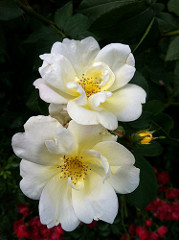

In [8]:
#Lets visualize them using the pillow library (PIL)

PIL.Image.open(str(roses[0]))

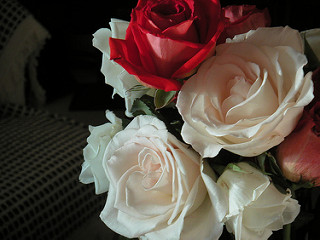

In [9]:
PIL.Image.open(str(roses[1]))

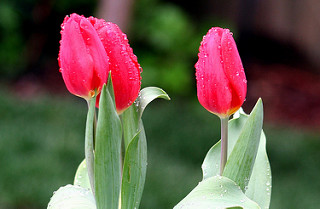

In [10]:
#Lets plot Tulips
tulips= list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [11]:
#Lets create a Dictionary to store all the images of all the flowers

flower_image_dict= {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [2]:
#flower_image_dict['roses']

In [13]:
#Lets add another Dictionary to add labels to all these flowers

flower_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

Okay, so now lets use the imread function of the open cv module.<br>

cv2.imread(path) <br>

Thus function take the file path as an input and converts it into a numpy Array.

In [14]:
flower_image_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

So as you would notice, these image paths are windows paths. If we pass them as it is in the imread function, we will get errors. So we always have to convert them into strings in order to retrive just the string path from them and then we can pass those paths in the imread function.

In [15]:
img= cv2.imread(str(flower_image_dict['roses'][0]))
img
#So you can see we just converted the first rose image into an array form.
#Now it has been stored as a 3 dimensional Numpy Array.

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [16]:
img.shape #3 denotes RGB

(240, 179, 3)

Okay, so now if you go and take a look at all the images in the folder, you'll notice one thing. Go to their properties and explore the deatils section, there you will find the size of the image in the form of pixcels. <br> 
You'll notice that every image has a similar form but they are not absolutely same. This is how the first 3 images of roses are stored. <br>

1. 320 X 240
2. 180 X 240
3. 320 X 256 and so on....

Now we want to store all these images in one constant form. So lets do this with the resize method of cv2 and convert all the images into a dimenional pixcel form of 180 X 180

In [17]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [18]:
#Lets see which flower has how many images
for flower_names, images in flower_image_dict.items():
    print(flower_names)
    print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [19]:
x,y= [],[] #Two empty lists
for flower_name, images in flower_image_dict.items():
    for img_path in images:
        img= cv2.imread(str(img_path))
        resized_img= cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flower_labels_dict[flower_name])

In [20]:
y[:5] #This indicates that the first 5 images are of the flower rose.

[0, 0, 0, 0, 0]

In [21]:
x[:5] #Array form in which first 5 images are stored

[array([[[ 1, 16,  7],
         [ 1, 16,  7],
         [ 1, 17,  9],
         ...,
         [23, 50, 31],
         [25, 51, 32],
         [26, 52, 33]],
 
        [[10, 23, 15],
         [10, 23, 15],
         [ 9, 22, 14],
         ...,
         [20, 44, 30],
         [23, 47, 33],
         [26, 50, 36]],
 
        [[13, 20, 13],
         [12, 20, 13],
         [11, 19, 12],
         ...,
         [21, 43, 30],
         [22, 45, 31],
         [25, 48, 34]],
 
        ...,
 
        [[12, 24, 18],
         [11, 22, 15],
         [12, 21, 11],
         ...,
         [ 7, 14,  7],
         [ 2,  8,  2],
         [ 0,  2,  0]],
 
        [[19, 30, 28],
         [16, 26, 21],
         [14, 22, 15],
         ...,
         [ 3, 12,  2],
         [ 0,  8,  1],
         [ 0,  6,  1]],
 
        [[11, 21, 20],
         [17, 25, 24],
         [21, 28, 23],
         ...,
         [ 1, 12,  2],
         [ 2, 10,  3],
         [ 3, 10,  4]]], dtype=uint8),
 array([[[13, 18, 17],
         [11, 13, 1

Now, x and y are two lists and we wanna convert them into Numpy Arrays because their array forms will be useful to us later on.

In [22]:
x=np.array(x)
y=np.array(y)

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=0) #Test Size is set to 0.25 by default

In [24]:
print(len(x_train)) #Samples in Training Set 
print(len(x_test)) #Samples in Testing Set

2752
918


In [25]:
#Lets scale all the values in x between 0 and 1
#Meanwhile they are ranging from 0 to 255

x_train_scaled= x_train/255
x_test_scaled= x_test/255

Now we are ready to build the NN Model!

In [26]:
num_classes=5
model= Sequential([
    
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes) #It will use Linear Activation by default if no function is passed

])

model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [27]:
model.fit(x_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 36s 399ms/step - loss: 1.4721 - accuracy: 0.3580
Epoch 2/30
86/86 [==============================] - 33s 385ms/step - loss: 0.9847 - accuracy: 0.6125
Epoch 3/30
86/86 [==============================] - 33s 386ms/step - loss: 0.8335 - accuracy: 0.6821
Epoch 4/30
86/86 [==============================] - 34s 392ms/step - loss: 0.6647 - accuracy: 0.7656
Epoch 5/30
86/86 [==============================] - 33s 388ms/step - loss: 0.4607 - accuracy: 0.8403
Epoch 6/30
86/86 [==============================] - 34s 399ms/step - loss: 0.2873 - accuracy: 0.9036
Epoch 7/30
86/86 [==============================] - 34s 396ms/step - loss: 0.1615 - accuracy: 0.9479
Epoch 8/30
86/86 [==============================] - 34s 391ms/step - loss: 0.0829 - accuracy: 0.9781
Epoch 9/30
86/86 [==============================] - 34s 391ms/step - loss: 0.0414 - accuracy: 0.9939
Epoch 10/30
86/86 [==============================] - 35s 408ms/step - loss: 0.0338 - accura

In [28]:
model.evaluate(x_test_scaled, y_test)

29/29 [==============================] - 2s 72ms/step - loss: 2.4846 - accuracy: 0.6580


[2.4846465587615967, 0.657952070236206]

So as you could see, the accuracy that we are getting on the training data is tremendous, nearly 100%. Where as, the accuracy on the testing data is merely 63%. Why is it so? <br>

Because our model got overfit during the training.<br>
Let's make some predictions before we use data augmentation to address overfitting

In [29]:
pred_y= model.predict(x_test_scaled)
pred_y
#We are getting 5 values for each output since the no. of neurons in the output layer was 5.
#And we are getting values spread so largely because the activation function that we used in the output layer was Linear.

array([[ 14.360862  ,  24.473919  ,  -0.29494148, -19.642395  ,
         -0.2877633 ],
       [  6.4799366 ,   2.1297998 ,  -7.563742  ,  -4.1448784 ,
          7.8586597 ],
       [ -1.0474728 ,   7.544109  ,  21.157822  , -11.723139  ,
          1.6930116 ],
       ...,
       [  2.2482402 ,  -6.1588235 ,  -6.352378  ,  15.165653  ,
         12.154416  ],
       [  7.47868   ,   6.4477572 ,  -3.2753875 ,  -1.3414718 ,
         -0.4136204 ],
       [  3.63125   , -10.336036  ,   1.6977816 ,  12.898033  ,
          7.5936127 ]], dtype=float32)

In [30]:
#If we wanna convert these values into probablity scores, we can use the softmax function provided by TensorFlow. 

scores= tf.nn.softmax(pred_y)
scores[0]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([4.0545016e-05, 9.9995947e-01, 1.7498596e-11, 6.9264499e-20,
       1.7624641e-11], dtype=float32)>

So we have got all the probablity scores in the form of epsilon indicating that they are in the range of 0 to 1.

In [31]:
np.argmax(scores[0]) #Its predicting our first image to be Daisy

1

In [32]:
y_test[0] #It is Daisy in reality as well

1

### Improve Test Accuracy Using Data Augmentation

To begin with, we define our Data Augmentation inside the keras.Sequential Model.

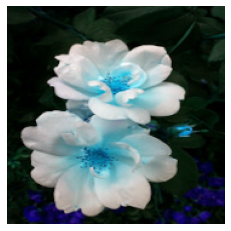

In [33]:
#First lets plot an image so that you could see and compare the changes after the Augmentation.

plt.axis('off') #Just to avoid the scale on x and y axis
plt.imshow(x[0])

#### Random Zoom

In [34]:
#Lets use Random Zoom for the Data Augmentation

data_augmentation= keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.3),
])

In [35]:
#x[0]

In [36]:
#So as you can see, augmenting the image has chnaged the pixcel values and positions, resulting in a new image
#data_augmentation(x)[0]

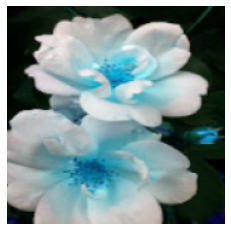

In [37]:
#Picture after augmentation
#After augmenting, we have to make sure that we convert it into a Numpy Array.

plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

#### Random Contrast

In [38]:
#Lets use Random Contrast for the Data Augmentation

data_augmentation= keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.9),
])

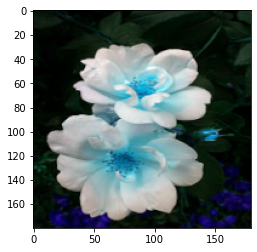

In [39]:
#Original Image
plt.imshow(x[0])

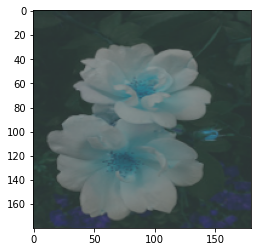

In [40]:
#Augmented Image
plt.imshow(data_augmentation(x)[0].numpy().astype('uint8'))

#### Random Rotation

In [41]:
#Lets use Random Rotation for the Data Augmentation

data_augmentation= keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.5),
])

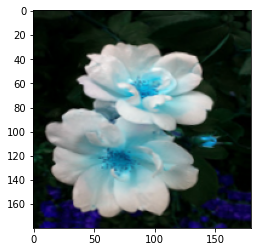

In [42]:
plt.imshow(data_augmentation(x)[0].numpy().astype('uint8'))

So all theese individual random transformations was to make you understand how this works. Now lets move towards our code and now we will supply all these transformations in a single Sequential object. Later on, we will use that Sequential object in training our Model.

In [43]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"), 
                                                 
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

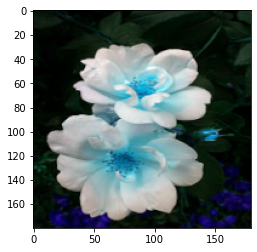

In [44]:
#Original Image
plt.imshow(x[0])

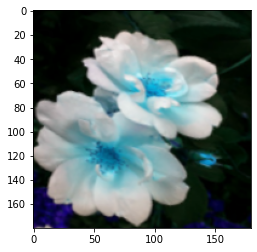

In [45]:
#Image after Augmentation

plt.imshow(data_augmentation(x)[0].numpy().astype('uint8'))

#### Model Building

In the starting of the Pipeline itself, we have added the data augmentation layer so all the inputs will first be augmented and then they all be passed further.<br>

We have also added a Dropout Layer which will drop 20% of the total neurons and will help in dealing with the Overfitting.

In [46]:
num_classes=5
model= Sequential([
    
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes) #It will use Linear Activation by default if no function is passed

])

model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [47]:
model.fit(x_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 40s 442ms/step - loss: 1.6737 - accuracy: 0.3259
Epoch 2/30
86/86 [==============================] - 37s 433ms/step - loss: 1.1630 - accuracy: 0.5088
Epoch 3/30
86/86 [==============================] - 37s 434ms/step - loss: 1.0466 - accuracy: 0.5806
Epoch 4/30
86/86 [==============================] - 37s 430ms/step - loss: 0.9637 - accuracy: 0.6237
Epoch 5/30
86/86 [==============================] - 37s 435ms/step - loss: 0.9174 - accuracy: 0.6454
Epoch 6/30
86/86 [==============================] - 38s 441ms/step - loss: 0.8517 - accuracy: 0.6784
Epoch 7/30
86/86 [==============================] - 37s 428ms/step - loss: 0.7940 - accuracy: 0.6875
Epoch 8/30
86/86 [==============================] - 38s 442ms/step - loss: 0.8039 - accuracy: 0.6801
Epoch 9/30
86/86 [==============================] - 37s 432ms/step - loss: 0.7556 - accuracy: 0.7118
Epoch 10/30
86/86 [==============================] - 36s 424ms/step - loss: 0.6873 - accura

In [48]:
model.evaluate(x_test_scaled, y_test)

29/29 [==============================] - 3s 80ms/step - loss: 0.8044 - accuracy: 0.7407


[0.8043863773345947, 0.7407407164573669]

#### You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 74%